# Project on Stock Prediction

Hello! My name is Shubham Patil. I have successfully completed this internship project working at Eckovation Careers. Without further ado, lets get started.

***Stock market prediction***  is the act of trying to determine the future value of a company stock or other financial instrument traded on an exchange. The successful prediction of a stock's future price could yield significant profit.

We use machine learning techiniques to forecast stock prices. Our stock price predictions cover a period of 2 years i.e NSE 2016 and NSE 2017. All the data are stored in a single csv file names "nse_data.csv".

The given ***nse_data.csv*** dataset contains a list of 10002 stocks each.

1. NSE 2016 - This is used as train dataset in order to train the mathematical model.
2. NSE 2017 - This is used as test dataset.
3. Predict - The prediction is then compared with test dataset (NSE 2017) to find the accuracy.

### Import Libraries 

In [50]:
import pandas as pd
import numpy as np
from datetime import datetime

import pandas as pd
import numpy as np

from datetime import datetime
#to plot within notebook
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
##%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 50,40

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import TheilSenRegressor, LinearRegression, RANSACRegressor


from sklearn.metrics import recall_score, precision_score


df = pd.read_csv('C:/Users/Shubham/nse_data.csv')

df.head()

,SYMBOL,SERIES,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES,ISIN
0,20MICRONS,EQ,37.80,37.80,36.15,36.85,37.40,37.05,27130,994657.90,2017-06-28,202,INE144J01027
1,3IINFOTECH,EQ,4.10,4.85,4.00,4.55,4.65,4.05,20157058,92148517.65,2017-06-28,7353,INE748C01020
2,3MINDIA,EQ,13425.15,13469.55,12920.00,13266.70,13300.00,13460.55,2290,30304923.35,2017-06-28,748,INE470A01017
3,63MOONS,EQ,61.00,61.90,60.35,61.00,61.10,60.65,27701,1689421.00,2017-06-28,437,INE111B01023
4,8KMILES,EQ,546.10,548.00,535.00,537.45,535.20,547.45,79722,43208620.05,2017-06-28,1866,INE650K01021


In [51]:
#Taking User Input
df2=df.groupby(["SYMBOL"])
df2


In [52]:
df2.head()

,SYMBOL,SERIES,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES,ISIN
0,20MICRONS,EQ,37.80,37.80,36.15,36.85,37.40,37.05,27130,994657.90,2017-06-28,202,INE144J01027
1,3IINFOTECH,EQ,4.10,4.85,4.00,4.55,4.65,4.05,20157058,92148517.65,2017-06-28,7353,INE748C01020
2,3MINDIA,EQ,13425.15,13469.55,12920.00,13266.70,13300.00,13460.55,2290,30304923.35,2017-06-28,748,INE470A01017
3,63MOONS,EQ,61.00,61.90,60.35,61.00,61.10,60.65,27701,1689421.00,2017-06-28,437,INE111B01023
4,8KMILES,EQ,546.10,548.00,535.00,537.45,535.20,547.45,79722,43208620.05,2017-06-28,1866,INE650K01021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
845727,ONEPOINT,SM,101.00,101.00,95.15,97.15,97.40,97.35,434000,42252300.00,2017-12-29,208,INE840Y01011
846005,SGBDEC2512,GB,2610.00,2680.01,2610.00,2680.01,2680.01,2890.00,11,29410.10,2017-12-29,2,IN0020170141
846015,SGBNOV258,GB,2730.00,2732.00,2730.00,2732.00,2732.00,2761.00,2,5462.00,2017-12-29,2,IN0020170109
846038,SHIVATEX,BE,528.65,528.65,528.65,528.65,528.65,503.50,317,167582.05,2017-12-29,11,INE705C01020


### Insert the name of stock you want to predict

In [125]:
user_input = (input("Enter Stock name: "))
stocks = df2.get_group(user_input)

Enter Stock name: 20MICRONS


### Time Series Analysis

In [126]:
start16 = datetime(2016, 1, 1)
end16 = datetime(2016, 12, 31)
stamp16 = pd.date_range(start16, end16)

start17 = datetime(2017, 1, 1)
end17 = datetime(2017, 12, 31)
stamp17 = pd.date_range(start17, end17)

stocks['Date'] = pd.to_datetime(stocks.TIMESTAMP,format='%Y-%m-%d')
stocks.index = stocks['Date']

C:\Users\Shubham\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


### Creating Separate Dataset

In [127]:
#New Dataset
stocks = stocks[['OPEN', 'HIGH', 'LOW', 'CLOSE', 'TOTTRDQTY', 'Date', 'PREVCLOSE', 'TOTTRDVAL', 'TOTALTRADES']]
stocks['HL_PCT'] = (stocks['HIGH'] - stocks['LOW']) / stocks['LOW'] * 100.0
stocks.index = stocks['Date']

#Seperating Train and test data
train = []
test = []
for index, rows in stocks.iterrows():
    if index in stamp16:
        train.append(list(rows))
    if index in stamp17:
        test.append(list(rows))

train = pd.DataFrame(train, columns = stocks.columns)
test = pd.DataFrame(test, columns = stocks.columns)

In [128]:
train.head()

,OPEN,HIGH,LOW,CLOSE,TOTTRDQTY,Date,PREVCLOSE,TOTTRDVAL,TOTALTRADES,HL_PCT
0,33.90,35.00,32.25,33.0,48174,2016-04-21,33.75,1593805.60,253,8.527132
1,32.30,33.70,31.80,32.7,12513,2016-05-13,32.30,409528.50,149,5.974843
2,32.30,32.80,31.55,32.2,28846,2016-05-06,32.00,930147.40,104,3.961965
3,27.55,28.50,26.90,27.3,82651,2016-03-29,27.55,2283316.35,263,5.947955
4,38.50,40.75,36.80,38.6,565195,2016-08-17,39.20,21912747.75,2267,10.733696


In [129]:
train.shape

(247, 10)

In [130]:
test.head()

,OPEN,HIGH,LOW,CLOSE,TOTTRDQTY,Date,PREVCLOSE,TOTTRDVAL,TOTALTRADES,HL_PCT
0,37.80,37.80,36.15,36.85,27130,2017-06-28,37.05,9.946579e+05,202,4.564315
1,52.90,61.70,52.90,59.40,2489935,2017-11-28,52.80,1.481265e+08,14196,16.635161
2,36.15,36.30,35.60,36.05,40594,2017-02-28,35.65,1.461975e+06,193,1.966292
3,44.35,44.80,43.55,43.90,90170,2017-04-28,44.80,3.984352e+06,597,2.870264
4,36.00,36.75,34.20,34.90,77310,2017-03-20,35.40,2.709788e+06,413,7.456140


In [131]:
test.shape

(248, 10)

### Pre-Processing  Train Data 

In [132]:
X_train = train[['HIGH', 'LOW', 'OPEN', 'TOTTRDQTY', 'TOTTRDVAL', 'TOTALTRADES']]
x_train = X_train.to_dict(orient='records')
vec = DictVectorizer()
X = vec.fit_transform(x_train).toarray()
Y = np.asarray(train.CLOSE)
Y = Y.astype('int')

### Pre-Processing Test data

In [133]:
X_test = test[['HIGH', 'LOW', 'OPEN', 'TOTTRDQTY', 'TOTTRDVAL', 'TOTALTRADES']]
x_test = X_test.to_dict(orient='records')
vec = DictVectorizer()
x = vec.fit_transform(x_test).toarray()
y = np.asarray(test.CLOSE)
y = y.astype('int')

### Classifier

In [134]:
clf = TheilSenRegressor()
clf.fit(X, Y) 
predict = clf.predict(x)
print("Accuracy of this Statistical Arbitrage model is: ",clf.score(x,y))

Accuracy of this Statistical Arbitrage model is:  0.9792944085200614


In [135]:
test['predict'] = predict

### Plot

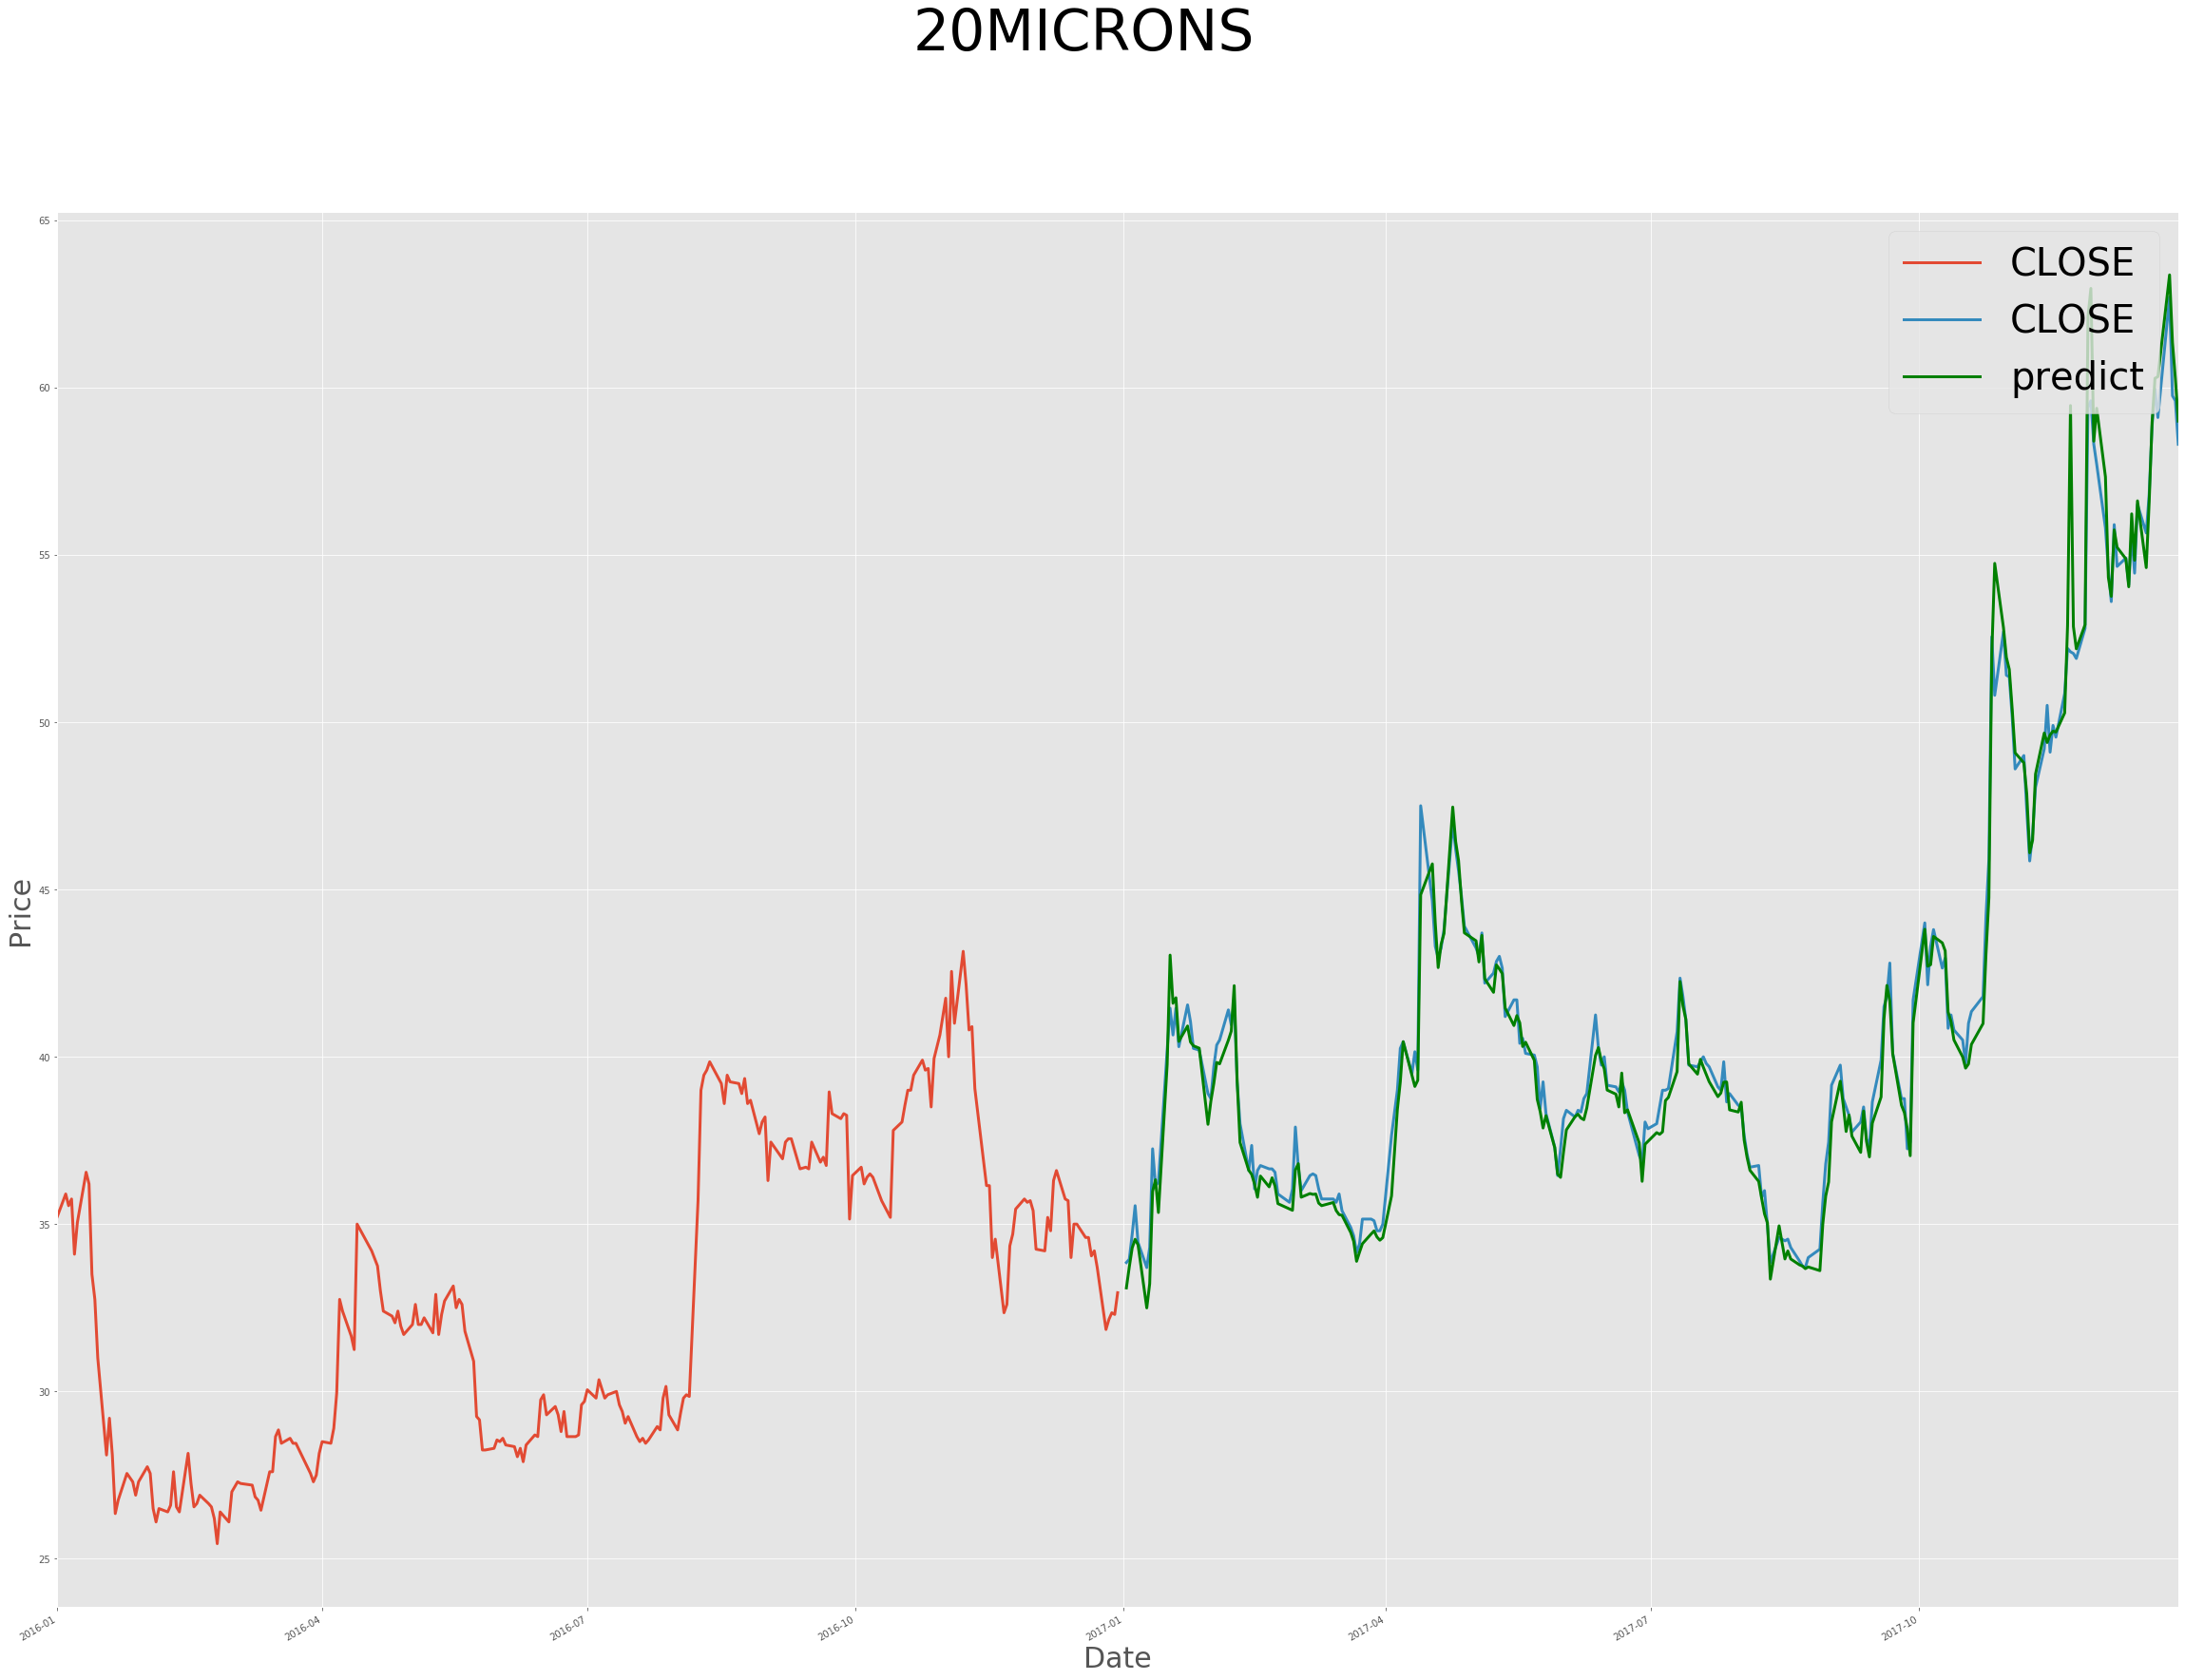

In [136]:
rcParams['figure.figsize'] = 40,30
fig = plt.figure()
fig.suptitle(user_input,fontsize=60)
train.index = train.Date
test.index = test.Date
train['CLOSE'].plot(linewidth=3.0)
test['CLOSE'].plot(linewidth=3.0)
test['predict'].plot(color="green",linewidth=3.0)
plt.legend(loc='upper right', prop={'size':40})
plt.xlabel('Date',fontsize=30)
plt.ylabel('Price',fontsize=30)
plt.show()